# WordCloud representation of 'The Christmas Carol'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from PIL import Image

#Last update Feb 2026 
%matplotlib inline

In [137]:
nltk.download('punkt')
nltk.download('stopwords')

In [142]:
# Constants
COLORS = (255, 255, 255)
DPI = 190
RGB = 'RGB'

# Core functions

In [143]:
def read_trim_data(data, chars, mode='r', enc='utf8'):
    """
    Reads a text file and remove unnecessary characters or words
    which may not be filtered by nltk
    """
    file = open(data, mode, encoding=enc)
    text = file.read()
    if len(chars) > 0:
        for i in range(len(chars)): 
            text = text.replace(chars[i], ' ')
    return text



def tokenise_text(input):
    """
    Tokenises input text and returns a tuple containing
    a list with the word tokens and a long string of the words
    """
    # Apply tokeniser and remove stopwords using nltk
    words = word_tokenize(input.lower())
    words = set(words)
    stop_words = set(stopwords.words('english'))
    
    filtered_words =[]
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    # Joins the all filtered words
    joined_string = ' '.join(filtered_words)
    return filtered_words, joined_string



def produce_wordcloud_image(input, image_file, max=200, cmap='RdBu'):
    """
    Makes a overlapping image
    """
    image = Image.open(image_file)
    image_mask = Image.new(mode=RGB,
                          size=image.size,
                          color=COLORS)
    image_mask.paste(image, box=image)
    rgb_arr = np.array(image_mask)
    plt.figure(figsize=(8, 6), dpi=DPI)
    word_cloud = WordCloud(mask=rgb_arr, 
                          background_color='white',
                          max_words=max,
                          colormap=cmap)
    word_cloud.generate(input)
    plt.axis('off')
    plt.imshow(word_cloud, interpolation='bilinear');


# Read and prepare data
Source: Charles Dickens, A Christmas Carol, Project Gutenberg, https://gutenberg.org/ebooks/19337

In [144]:
DATA = 'christmas_carol.txt'
TREE = 'tree.png'
# characters or words to remove
characters = ['\n', '*', '\u2028', '\xa0', '\'', 'yes', 'no' ]

In [145]:
text = read_trim_data(data=DATA, chars=characters)

### Tokenize and remove stopwords

In [146]:
# Get the joined and filtered words
string_text = tokenise_text(input=text)[1]

# Generate a masked wordcloud image

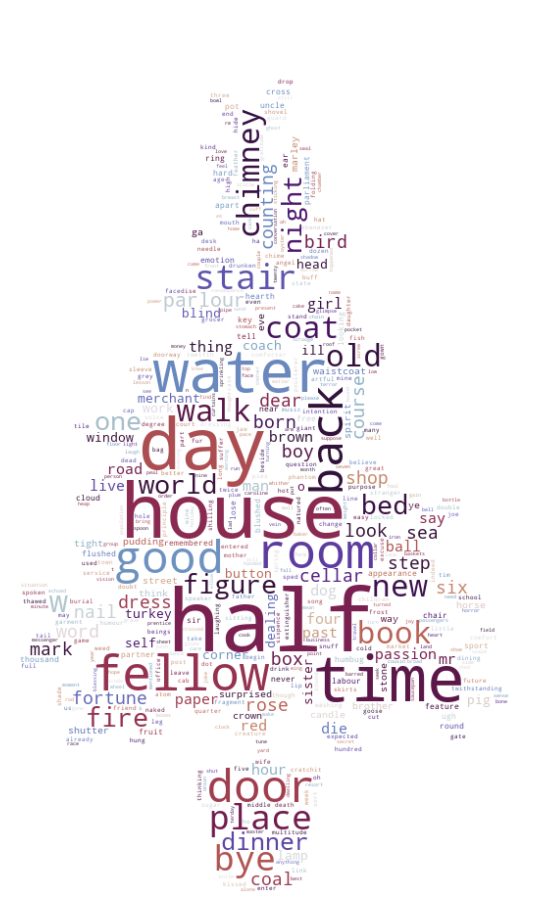

In [148]:
# image and mask 
produce_wordcloud_image(input=string_text, max=700, image_file=TREE, cmap='twilight')
